In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline
tau_table = pd.read_csv("tau.csv")
tau_table.head()
auc_table = tau_table[["dataset", "tau", "auc"]]
# auc_table

In [2]:
table = pd.pivot_table(auc_table, values='auc', index=['tau'], columns=['dataset'], aggfunc=np.max)
a = table.reset_index()
tau_list = []
data_list = []
auc_list = []
for dataset in ['Cora', "Citeseer" , "Pubmed", "ACM", "ogbn-arxiv"]:
    tau_list.extend(list(a['tau']))
    data_list.extend([dataset]*len(a))
    auc_list.extend(list(a[dataset]))

final_table = pd.DataFrame({
    "dataset":data_list,
    "tau":tau_list,
    "auc":auc_list
})
final_table.head()
# palette = sns.cubehelix_palette(light=.7, n_colors=6)


,dataset,tau,auc
0,Cora,0.1,0.862419
1,Cora,0.2,0.884477
2,Cora,0.3,0.889500
3,Cora,0.5,0.896211
4,Cora,0.6,0.902377


In [3]:
# help(sns.lineplot)

In [4]:
import pandas as pd
import numpy as np 
alpha_table = pd.read_csv("alpha.csv")
alpha_table.head()
alpha_auc_table = alpha_table[["dataset", "alpha", "auc"]]
# auc_table

In [5]:
table = pd.pivot_table(alpha_auc_table, values='auc', index=['alpha'], columns=['dataset'], aggfunc=np.max)
table

dataset,ACM,Citeseer,Cora,Pubmed,ogbn-arxiv
alpha,,,,,
0.0,0.763878,0.818938,0.839051,0.957566,0.874711
0.1,0.788946,0.822373,0.862903,0.962604,0.881215
0.2,0.791958,0.840965,0.864631,0.966704,0.890098
0.3,0.815983,0.837295,0.876768,0.966683,0.900356
0.5,0.834534,0.860972,0.883021,0.972293,0.908145
0.6,0.846979,0.860460,0.898147,0.970571,0.912063
0.8,0.857578,0.875626,0.892731,0.972983,0.915444
0.9,0.863984,0.878537,0.892424,0.975122,0.915541
1.0,0.873403,0.878626,0.900599,0.972801,0.919257


In [6]:
import joblib
dataset = 'ACM'

scoreplot_file_path = f"log/{dataset}plotscore/{dataset}_score/epoch399.pkl"
pklfile = joblib.load(scoreplot_file_path)
label = pklfile['label']
score = pklfile['scores']

data = pd.DataFrame({
    "dataset":["ACM"]*len(label),
    "label":label,
    "score":score
})
for dataset in ['Cora', "Pubmed", "ogbn-arxiv", ]:
    if dataset != "ogbn-arxiv":
        scoreplot_file_path = f"log/{dataset}plotscore/{dataset}_score/epoch99.pkl"
    else:
        scoreplot_file_path = f"log/{dataset}plotscore/{dataset}_score/epoch19.pkl"
    pklfile = joblib.load(scoreplot_file_path)
    label = pklfile['label']
    score = pklfile['scores']

    t_data = pd.DataFrame({
        "dataset":[dataset]*len(label),
        "label":np.where(np.array(label)==0, 0, 1),
        "score":score
    })
    data = pd.concat([data, t_data], axis=0)


In [7]:
data.tail()
data.to_csv("plot/MI.csv")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


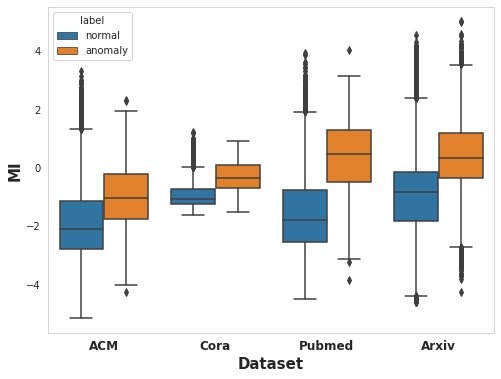

In [8]:
data['label'] = data['label'].astype(int).map({0:'normal', 1:'anomaly'})
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="dataset", y="score", hue='label',
                 data=data, linewidth=1.5)
ax.set_xticklabels(['ACM', 'Cora', 'Pubmed', 'Arxiv'], fontsize = 12, fontweight='bold')
ax.set_xlabel("Dataset", fontsize = 15, fontweight='bold')
ax.set_ylabel("MI", fontsize = 15, fontweight='bold')
plt.savefig("1.eps", dpi=400)
plt.show()